In [33]:
import os
import sys

def path_link(path:str):
    sys.path.append(path)

path_link('/home/jpierre/v2/lib')
path_link('/home/jpierre/v2/lib')

import display as disp
import training as tr
import dataLoading as dl
import torch
import features as ft
import NNSimulator as nnsim

from torch.utils.data import DataLoader as DataLoaderPy



DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



#R_PARAM = cfg['simulation']['parameters']['R']
#MIN_RAD = cfg['normalization']['radius']['minRad']
#MAX_RAD = cfg['normalization']['radius']['maxRad']

import matplotlib.pyplot as plt


### Link to the models

In [48]:
mod = tr.loadModel('compex_model', inputShape= 8, edges_shape = 5)
#mod = tr.loadModel('model_1_3')

In [49]:
stateDict = '/home/jpierre/v2/test_n/model_trained/trainingBestTest22.pt'
#stateDict = '/home/jpierre/v2/test_rollout/model_trained/trainingBestTest.pt'

stDict = torch.load(stateDict, map_location=torch.device('cpu'))  # change CPU ...

mod.load_state_dict(stDict)
mod = mod.to(DEVICE)
mod.eval()

deepGNN(
  (enc): encoder(
    (mlp): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=8, out_features=48, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Dropout(p=0.3, inplace=False)
        (3): Linear(in_features=48, out_features=88, bias=True)
        (4): LeakyReLU(negative_slope=0.01)
        (5): Dropout(p=0.3, inplace=False)
        (6): Linear(in_features=88, out_features=128, bias=True)
      )
    )
    (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (GNNLayers): ModuleList(
    (0-1): 2 x GN3()
  )
  (layerNormList): ModuleList(
    (0-1): 2 x LayerNorm((128,), eps=1e-05, elementwise_affine=True)
  )
  (dec): MLP(
    (mlp): Sequential(
      (0): Linear(in_features=128, out_features=86, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=86, out_features=44, bias=True)
      (4): LeakyReLU(negative_slope=0.01)
      (5): Dropout(p=0.3, inplace=Fals

### SImulation

In [50]:
cwd = os.getcwd()
path = os.path.join(cwd, 'vid_test_d.mp4')
p2 = os.path.join(cwd, 'vid_test.mp4')
vidParams = disp.videoParameters(path)
vidParams2 = disp.videoParameters(p2)

In [51]:
# loader of simualion
p_data = '/scratch/users/jpierre/pikachu'
p_sim = os.path.join(p_data, 'validation/np_file')
loader = dl.simLoader2(p_sim)   
loaderSim = DataLoaderPy(loader, batch_size=1, shuffle=False)

1it [00:02,  2.33s/it]


In [52]:
for d, _ in loaderSim:
    break

In [53]:
d = torch.squeeze(d, dim = 0).numpy()
                
res = nnsim.getSimulationData(mod, 1000, d)

100%|██████████| 1000/1000 [00:38<00:00, 25.66it/s]


In [54]:
res = res.detach().cpu().numpy()

In [47]:
disp.create_simulation_video_cv2(d.copy(), vidParams, ((-150, 150), (-150, 150)))
disp.create_simulation_video_cv2(res.copy(), vidParams2, ((-150, 150), (-150, 150)))

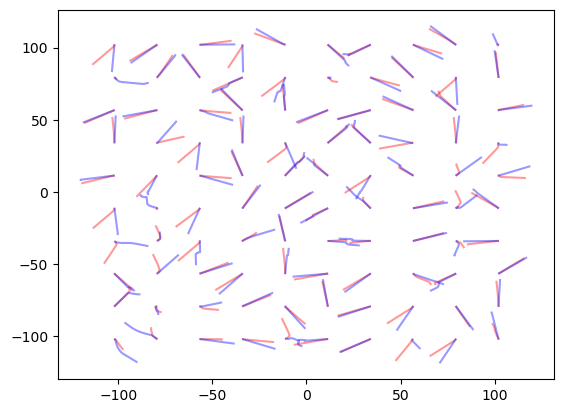

In [57]:
n = 100
base = 5
dec = 300

#plt.plot(res[:7, n, 0], res[:7, n, 1], 'r', alpha = 0.4)
#plt.plot(d[5:12, n, 0], d[5:12, n, 1], 'b', alpha = 0.4)

for i in range(n):
    plt.plot(res[:dec, i, 0], res[:dec, i, 1], 'r', alpha = 0.4)
    plt.plot(d[base:(base + dec), i, 0], d[base:(base + dec), i, 1], 'b', alpha = 0.4)
plt.show()

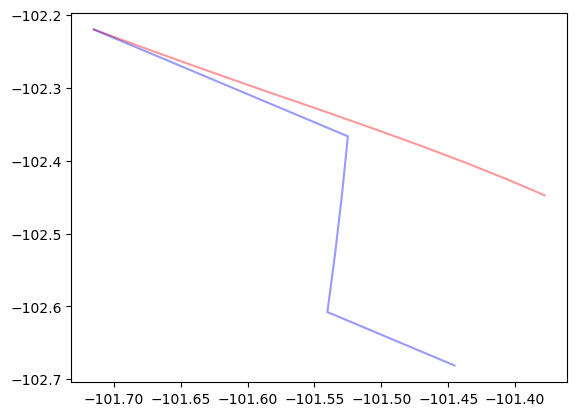

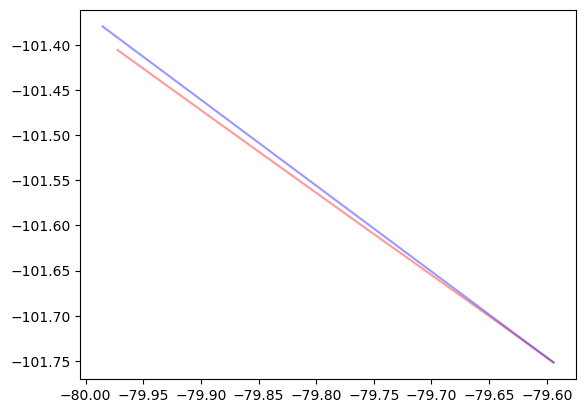

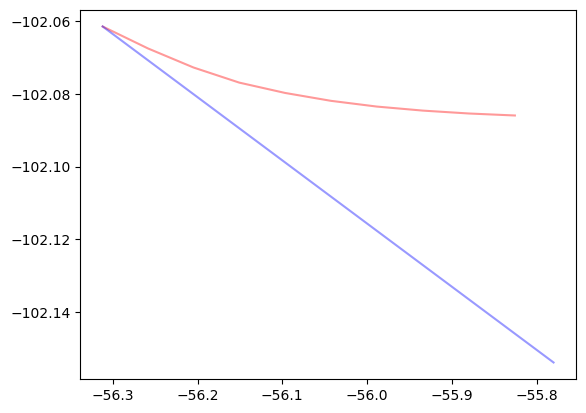

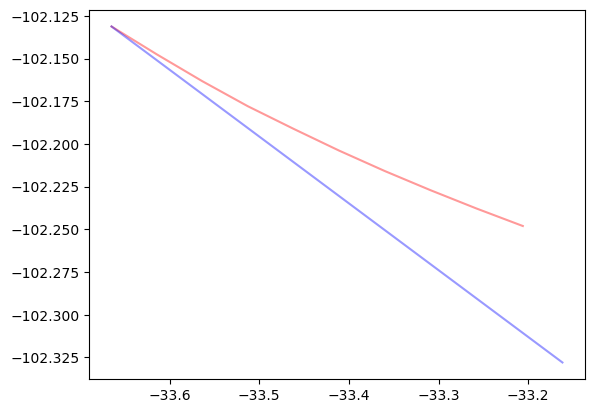

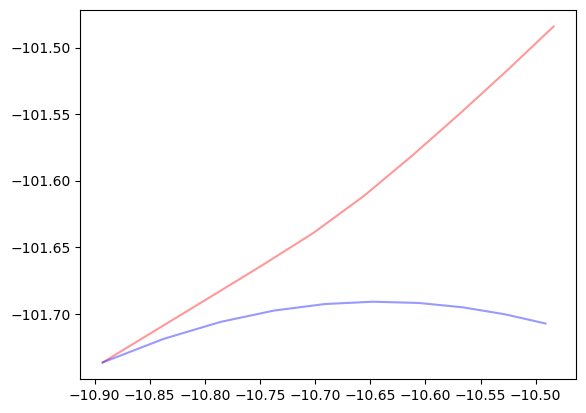

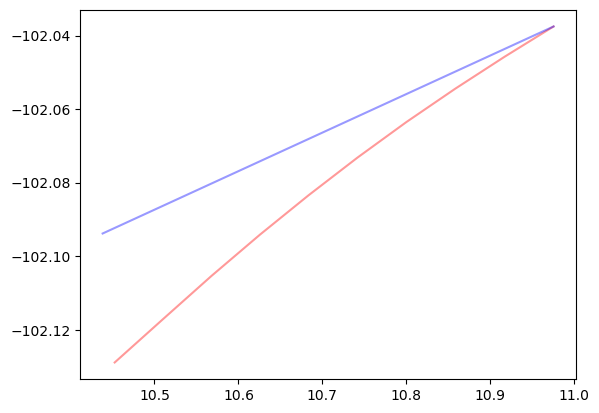

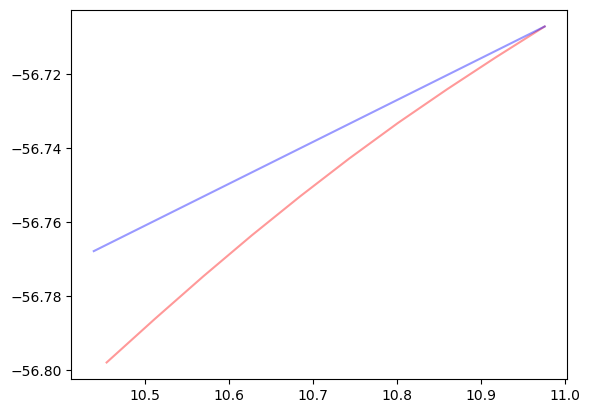

In [56]:
n = 0
base = 5
dec = 10

for n in [0, 1, 2, 3, 4, 5, 25]:
    plt.plot(res[:dec, n, 0], res[:dec, n, 1], 'r', alpha = 0.4)
    plt.plot(d[base:(base+dec), n, 0], d[base:(base + dec), n, 1], 'b', alpha = 0.4)
    plt.show()